In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [14]:
from google.colab import drive
drive.mount('/content/drive')
house = pd.read_csv('/content/drive/My Drive/ml project/house_prices.csv')
print(house.shape)
house.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,N,0,...,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,N,0,...,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,N,0,...,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,N,0,...,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,N,0,...,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [15]:
X = house.drop('price', axis=1)  # Features
y = house['price']  # Target variable

In [16]:
house = house.drop_duplicates()

In [17]:
house.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [18]:
import pandas as pd

# Select numerical data
data = house.select_dtypes(include=[np.number])
X = data.fillna(data.mean())

In [20]:
# Select numerical data
data = house.select_dtypes(include=[np.number])

# Interpolate missing values
house[data.columns] = data.interpolate(method='linear', axis=0)

In [21]:
house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,N,0,...,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,N,0,...,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,N,0,...,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,N,0,...,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,N,0,...,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,N,0,...,11,3890.0,1530.0,2001,0,98053,47.6561,-122.005,4760.0,101930.0
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,N,0,...,7,1715.0,0.0,1995,0,98003,47.3097,-122.327,2238.0,6819.0
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,N,0,...,7,1060.0,0.0,1963,0,98198,47.4095,-122.315,1650.0,9711.0
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,N,0,...,7,1050.0,730.0,1960,0,98146,47.5123,-122.337,1780.0,8113.0
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,N,0,...,7,1890.0,0.0,2003,0,98038,47.3684,-122.031,1995.0,7570.0


In [22]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Exclude 'date' from categorical columns if present
if 'date' in categorical_cols:
    categorical_cols.remove('date')


In [23]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

date_column = 'date'

label_encoder = LabelEncoder()

X_train[date_column] = X_train[date_column].astype(str)
X_test[date_column] = X_test[date_column].astype(str)

all_dates = pd.concat([X_train[date_column], X_test[date_column]]).unique()
label_encoder.fit(all_dates)

X_train[date_column] = label_encoder.transform(X_train[date_column])
X_test[date_column] = label_encoder.transform(X_test[date_column])

In [24]:
house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,N,0,...,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,N,0,...,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,N,0,...,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,N,0,...,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,N,0,...,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,N,0,...,11,3890.0,1530.0,2001,0,98053,47.6561,-122.005,4760.0,101930.0
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,N,0,...,7,1715.0,0.0,1995,0,98003,47.3097,-122.327,2238.0,6819.0
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,N,0,...,7,1060.0,0.0,1963,0,98198,47.4095,-122.315,1650.0,9711.0
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,N,0,...,7,1050.0,730.0,1960,0,98146,47.5123,-122.337,1780.0,8113.0
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,N,0,...,7,1890.0,0.0,2003,0,98038,47.3684,-122.031,1995.0,7570.0


In [25]:
print(house.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train = X_train.drop('price', axis=1)
X_test = X_test.drop('price', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [46]:
y_pred = knn.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Mean Squared Error: 39544138199.646255
Mean Absolute Error: 96741.65412907703
R² Score: 0.7384244067137877


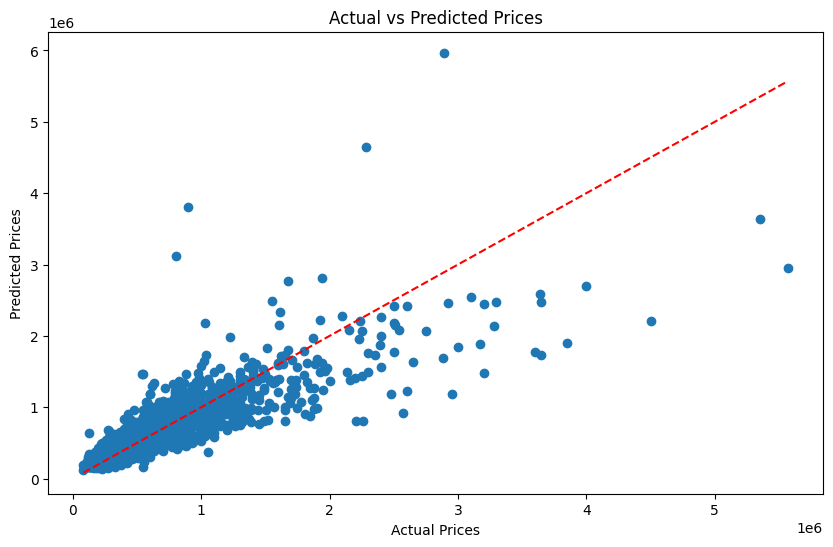

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

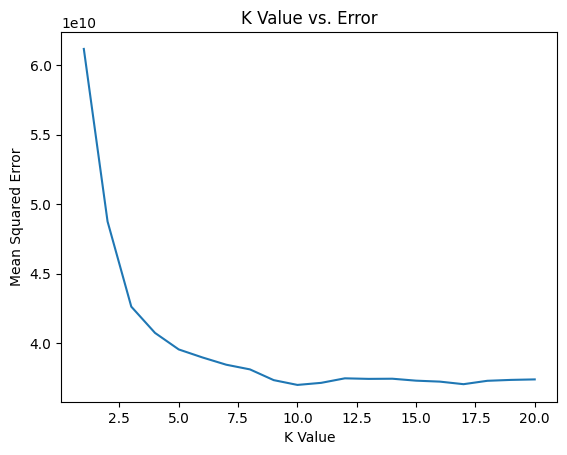

In [49]:
from sklearn.metrics import mean_squared_error

k_values = range(1, 21)
mse_values = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred_k))

plt.plot(k_values, mse_values)
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error")
plt.title("K Value vs. Error")
plt.show()